# Overview

Networks (a.k.a. graphs) are widely used mathematical objects for representing and analysing social systems. 
This week is about getting familiar with networks, and we'll focus on four main aspects:

* Basic mathematical description of networks
* The `NetworkX` library.
* Building the network of Computational Social Scientists.
* Basic analysis of the network of Computational Social Scientists

# Part 1: Basic mathematical description of networks

This week, let's start with some lecturing. You will watch some videos made by Sune for his course _Social Graphs and Interactions_, where he covers networks in detail.  

> **_Video Lecture_**. Start by watching the ["History of Networks"](https://youtu.be/qjM9yMarl70). 


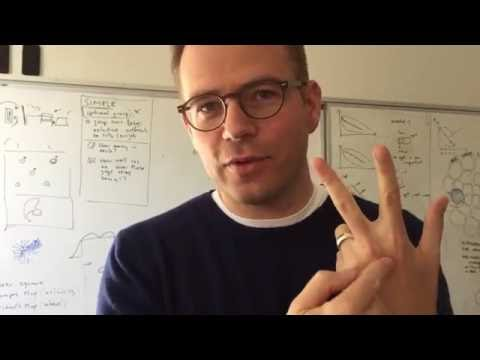

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo("qjM9yMarl70",width=800, height=450)

> **_Video Lecture_**. Then check out a few comments on ["Network Notation"](https://youtu.be/MMziC5xktHs). 

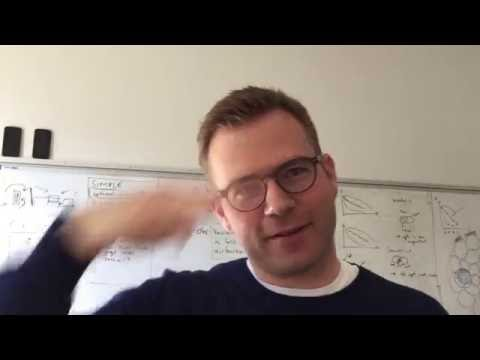

In [2]:
YouTubeVideo("MMziC5xktHs",width=800, height=450)

> __Reading__. We'll be reading the textbook _Network Science_ (NS) by Laszlo Barabasi. You can read the whole 
> thing for free [**here**](http://barabasi.com/networksciencebook/). 
> 
> * Read chapter 1\.
> * Read chapter 2\.
> 

> __Exercise 1__  Answer in a Jupyter notebook.
> * List three different real networks and state the nodes and links for each of them.
> * Tell us of the network you are personally most interested in. Address the following questions:
>   * What are its nodes and links? 
>   * How large is it? 
>   * Can be mapped out? 
>   * Why do you care about it? 
> * In your view what would be the area where network science could have the biggest impact in the next decade? Explain your answer - and base it on the text in the book. 
>
> One person per pair: go to [DTU Learn](https://learn.inside.dtu.dk/d2l/home/145262) and fill the Survey "_Networks_"

# Part 2: Exercises using the `NetworkX` library

We will analyse networks in Python using the [NetworkX](https://networkx.org/) library. The cool thing about networkx is that it includes a lot of algorithms and metrics for analysing networks, so you don't have to code things from scratch. Get started by running the magic ``pip install networkx`` command. Then, get familiar with the library through the following exercises: 

>  __Exercises__ We will start by solving some exercises from the book.

> * Go to the NetworkX project's [tutorial page](https://networkx.org/documentation/stable/tutorial.html). The goal of this exercise is to create your own notebook that contains the entire tutorial. You're free to add your own (e.g. shorter) comments in place of the ones in the official tutorial - and change the code to make it your own where ever it makes sense.
> * Go to Section 2.12: [Homework](http://networksciencebook.com/chapter/2#homework2), then
>     * Write the solution for exercise 2.1 (the 'Königsberg Problem') from NS in your notebook.
>     * Solve exercise 2.3 ('Graph representation') from NS using NetworkX in your notebook. (You don't have to solve the last sub-question about cycles of length 4 ... but I'll be impressed if you do it).
>     * Solve exercise 2.5 ('Bipartite Networks') from NS using NetworkX in your notebook.

In [46]:
import networkx as nx
G = nx.Graph()

G.add_node(1)
G.add_nodes_from([2,3])

# Part 3: Building the network of Computational Social Scientisti

Ok, enough with theory :) It is time to go back to our cool dataset that was super painful to download! And guess what? We will build the network of Computational Social Scientists. Then, we will use some Network Science to study some of its properties.

> **Exercise 1: Filter Computational Social Science Papers**. Our set of articles contains many papers that we do not want to retain. A first task is that of selecting CSS papers. We will adopt a heuristic method. What we know ia that Computational Social Science is about using quantitative methods to tackle a Social Science questions. So, we will filter papers that cover at least one field within the Social Science, and that include some quantiative methods or some experts in a quantitative discipline. Follow me:
> 1. Write a function that given a list of authorIds outputs the list of their top fields. __Note:__  You should use the column "*field*" in your *author* dataset.     
> 2. Apply this function to each record of the authorIds column in your *paper* dataset. Store the result in a new column of your *paper* dataset, called  "*author_field*".   
> 3. Create a set of *social_science_fields* that includes the following disciplines: _Political Science_, _Sociology_, _Economics_ 
> 4. Create a set of *quantitative_fields* that includes the following disciplines: _Mathematics_, _Physics_, _Computer Science_.    
> 5. Select the subset of rows in your paper dataset that respect all of the following conditions: 
>     * the paper *fields* include at least one of the *social_science_fields* 
>     * the paper *fields* include at least one of the *quantitative_fields*  OR the paper is written by at least one author whose top field is among the *quantitative_fields*.
>     * the paper does not include the field "_Biology_" 
>     * the paper has less than 10 Computational Social Science authors    
>     * the paper is published after 2008     
>     * the paper has a DOI    
>Store the results in a new dataframe called *ccs_papers*. Save the dataframe to file. __Note:__ we will not use the entire _paper_ dataset again. 


In [47]:
import pandas as pd
import os

#data = pd.read_csv('../additional_notebooks/author_df.csv')
#papers = pd.read_csv('../additional_notebooks/paper_df.csv')
#data.head()

def make_data():
    init = pd.read_pickle('../shared_data/paper_subset/1708.pkl')
    final = pd.DataFrame(columns=init.keys())
    files = os.listdir('../shared_data/paper_subset')
    for file in files[1:]:
        if file.endswith(".pkl"):
            temp = pd.read_pickle('../shared_data/paper_subset/'+file)
            final = pd.concat([final, temp])
    
    return final


#t = pd.read_pickle('../shared_data/paper_subset/1708.pkl')
#t2 = pd.read_pickle('../shared_data/paper_subset/1791.pkl')
#t3 = pd.concat([t,t2])
#t3

papers = make_data()



In [49]:
#papers = pd.read_csv('../additional_notebooks/paper_df.csv')
papers

,paperId,title,year,citationCount,externalIds.DOI,keywords,authorIds,author_fields
12029,0bdf5c3a04113de74b556d75ccf60219ff13dfa3,INCIDENCE STUDY,1966,27.0,10.1111/j.1651-2227.1966.tb09054.x,[Education],"[5524791, 6128841, 3536088, 4899448, 2939966]","[Psychology, Psychology, Medicine, Psychology,..."
37765,01c869a44b23e541901be7ba2ca5be5f2a2e5cf1,[Complications and complaints after laparotomy].,1966,0.0,NaN,[Medicine],[5992047],[Medicine]
37766,2b9b481cbe1a59acce86c456a49077308a9c59bb,[Round table conference. Indications for non-s...,1966,0.0,NaN,[Medicine],[5992047],[Medicine]
37767,86d1c0537a03ac211fb12e4284a2bbf3a29aca16,[Postoperative diet control].,1966,0.0,NaN,[Medicine],[5992047],[Medicine]
62291,0567f8040368186d4023c4f1f151fe5a4da20a2e,Studies on the lipid composition of human smal...,1966,14.0,10.1172/JCI105458,[Medicine],[4570837],[Medicine]
...,...,...,...,...,...,...,...,...
2639527,10cac0ff5aaec88900ebcb900d52b1fe1da74c5f,"The philosopher's guide to sources, research t...",1980,0.0,NaN,[],[80468947],[Business]
2641555,71e678f9639cf871cf68989e500725bfa509cdef,Proposal to conserve the generic name Hagenia ...,1980,0.0,10.2307/1220644,[],[144949921],[Agricultural And Food Sciences]
2643126,c50e905d4e59b2906add6c01b5db5f99ce946d81,[Submandibular gland hypertrophy by the inciso...,1980,0.0,NaN,[Medicine],[8457969],[Medicine]
754209,a58597b51f2f1b102b05ef91870ce92e06dd1065,VIII. Description of the Cermatia longicornis ...,1823,5.0,10.1111/J.1095-8339.1823.TB00084.X,[Biology],[5035526],[Psychology]


In [50]:
def fields(df: pd.DataFrame, ids: list) -> list:
    return [df[df['ids'] == id]['field'].values[0] for id in ids]


In [51]:
import numpy as np
social_science_fields = np.array(["Political Science", "Sociology", "Economics"])
quantitaive_fields = np.array(["Mathematics", "Physics", "Computer Science"])

af = np.array(papers.author_fields)

def masker(L1, L2):
    temp = []
    for L in L1:
        ost = [i for i in L if i in L2]
        if len(ost) > 0:
            temp.append(True)
        else:
            temp.append(False)

    return temp

mask1 = masker(af,social_science_fields)




/var/folders/zb/r3t36n8x4yxdbb4wy91dghwc0000gn/T/ipykernel_98936/2983701570.py:10: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ost = [i for i in L if i in L2]


In [52]:
df1 = papers[mask1]
af1 = np.array(df1.author_fields)
mask2 = masker(af1, quantitaive_fields)

/var/folders/zb/r3t36n8x4yxdbb4wy91dghwc0000gn/T/ipykernel_98936/2983701570.py:10: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ost = [i for i in L if i in L2]


In [53]:
df2 = df1[mask2]
af2 = np.array(df2.author_fields)
df2

,paperId,title,year,citationCount,externalIds.DOI,keywords,authorIds,author_fields
24137,41f0a002617ef6b86ff2dedfa96c19557481452b,General lectures (II),1973,0.0,10.1007/BF02775054,[Mathematics],"[52422435, 5992047, 66883613, 152318582, 15289...","[Medicine, Medicine, Business, Physics, Medici..."
11864,cb917c1768674005f6da900e60fd04d6b2824139,Fillingasilowithamixtureofgrains: Friction-ind...,1998,0.0,NaN,[Geology],"[144186189, 3141455, 2337765]","[Economics, Physics, Physics]"
32704,f1f9be043d893e050833d90a91e732613500bd7a,A Uniform Visual-Spatio-Temporal Model for Ind...,1998,0.0,NaN,[],"[2094220966, 2099295101]","[Economics, Computer Science]"
100730,63858d692d2c35232b30cb1a1a2c255ec70bc477,Acknowledgments to Referees,1998,0.0,10.1086/515814,[History],"[117144316, 46659043, 2188748, 40430719, 50096...","[History, Psychology, Economics, History, Econ..."
206476,64a3ef41da8550016d5a001361c5a30a95409658,Critical exponents of the anisotropic Bak-Snep...,1998,16.0,10.1103/physreve.58.7141,[Mathematics],"[47502097, 1680424]","[Computer Science, Economics]"
...,...,...,...,...,...,...,...,...
2503029,d9f605720a8a5c6e98c5d2285e80cdd466115dba,Representing Preferences as Ceteris Paribus Co...,1994,96.0,NaN,[Computer Science],"[47391383, 48067310]","[Economics, Computer Science]"
666087,38d409c7db2dc7609be3d1a1be74488868819f79,Toward a metric of science : the advent of sci...,1980,149.0,10.2307/2287482,[Education],"[7347752, 35345313]","[Sociology, Computer Science]"
720408,6d9628fa2792ca82fb1b2f8fd70bbc4f7a294d90,Volume Information,1980,0.0,10.1086/ajs.85.6.2778377,[History],"[3893846, 5419768, 13009091, 2901051, 37780032...","[Psychology, Sociology, Sociology, Psychology,..."
2004349,b599258c249cac0fb3a2656ab18fadf17d976865,Role-Programme Models and the Analysis of Inst...,1980,16.0,10.1177/003803858001400103,[Economics],"[2445123, 102823981, 3233874]","[Sociology, Computer Science, Economics]"


In [54]:
def rev_masker(L1, L2):
    temp = []
    for L in L1:
        ost = [i for i in L if i in L2]
        if len(ost) > 0:
            temp.append(False)
        else:
            temp.append(True)

    return temp

mask3 = rev_masker(af2,np.array(["Biology"]))

df3 = df2[mask3]
af3 = np.array(df3.author_fields)


/var/folders/zb/r3t36n8x4yxdbb4wy91dghwc0000gn/T/ipykernel_98936/2473856235.py:4: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ost = [i for i in L if i in L2]


In [55]:
def ss_masker(L1, L2):
    temp = []
    for L in L1:
        ost = [i for i in L if i in L2]
        if len(ost) < 10:
            temp.append(True)
        else:
            temp.append(False)

    return temp

mask4 = ss_masker(af3, social_science_fields)
df4 = df3[mask4]

/var/folders/zb/r3t36n8x4yxdbb4wy91dghwc0000gn/T/ipykernel_98936/2848733561.py:4: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ost = [i for i in L if i in L2]


In [56]:
df5 = df4[df4['year'] > 2008]
df5

,paperId,title,year,citationCount,externalIds.DOI,keywords,authorIds,author_fields
147,35115b0f0a70af50397fba7c0a08bd0b3617dd45,EINS D1.2 Roadmap for an economic theory for i...,2015,0.0,NaN,[Economics],"[1726746, 48670855, 7712811, 145940146]","[Computer Science, Art, Computer Science, Econ..."
3743,723b30edce2a7a46626a38c8f8cac929131b9ed4,Daemo: A Self-Governed Crowdsourcing Marketplace,2015,48.0,10.1145/2815585.2815739,"[Computer Science, Business]","[1409288721, 1844994, 2064565683, 1409160627, ...","[Computer Science, Computer Science, Computer ..."
7649,e1be3a91cebc517117364ed06a0786a83b47657f,Proceedings of the ACM Web Science Conference,2015,3.0,10.1145/2786451,[Computer Science],"[2020931, 1708123, 3448243]","[Sociology, Computer Science, Computer Science]"
8197,bbff76c64bfc26befee4b6ebcd74a34bf8ea0d6d,Campaign Management Under Approval-Driven Voti...,2015,0.0,10.1007/s00453-015-0064-0,[Computer Science],"[1771983, 1729566, 2469517]","[Mathematics, Economics, Economics]"
9638,42013f7c8bcf51fefb5ebef10ddd071f941eb6c3,Robotics Narratives and Networks [History],2015,5.0,10.1109/MRA.2014.2385564,[Education],"[3340774, 2724679, 1780030, 1746316]","[Sociology, Political Science, Computer Scienc..."
...,...,...,...,...,...,...,...,...
2261891,d7d7bd96285863a4c18dd142377e678667733506,Afterword: The Creative Industries — Arts and ...,2018,0.0,10.1108/S0733-558X20180000055010,[Art],"[40225913, 23684058]","[Economics, Computer Science]"
2349051,5d038236a76ec40d0c5c980137ee1f6cea032619,Breaking the bank. (Cover story),2018,0.0,NaN,[Economics],"[1682773, 39013717]","[Computer Science, Economics]"
2405502,480d10943b98ffec83bd56f48bfa525063dcb5fc,Towards Informed Practice in HCI for Development,2018,15.0,10.1145/3274368,[Business],"[145315377, 2875293]","[Economics, Computer Science]"
2420044,23cfa4c6cc8e403f881d60214a2b337aafb380ab,Characterizing Efficient Referrals in Social N...,2018,2.0,10.1145/3184558.3186910,[Computer Science],"[1708847, 1388775854]","[Economics, Computer Science]"


In [57]:
filtered_df = df5.dropna()
filtered_df


,paperId,title,year,citationCount,externalIds.DOI,keywords,authorIds,author_fields
3743,723b30edce2a7a46626a38c8f8cac929131b9ed4,Daemo: A Self-Governed Crowdsourcing Marketplace,2015,48.0,10.1145/2815585.2815739,"[Computer Science, Business]","[1409288721, 1844994, 2064565683, 1409160627, ...","[Computer Science, Computer Science, Computer ..."
7649,e1be3a91cebc517117364ed06a0786a83b47657f,Proceedings of the ACM Web Science Conference,2015,3.0,10.1145/2786451,[Computer Science],"[2020931, 1708123, 3448243]","[Sociology, Computer Science, Computer Science]"
8197,bbff76c64bfc26befee4b6ebcd74a34bf8ea0d6d,Campaign Management Under Approval-Driven Voti...,2015,0.0,10.1007/s00453-015-0064-0,[Computer Science],"[1771983, 1729566, 2469517]","[Mathematics, Economics, Economics]"
9638,42013f7c8bcf51fefb5ebef10ddd071f941eb6c3,Robotics Narratives and Networks [History],2015,5.0,10.1109/MRA.2014.2385564,[Education],"[3340774, 2724679, 1780030, 1746316]","[Sociology, Political Science, Computer Scienc..."
15019,918326f08d707327eba535f75050e61839726a9d,The EChO science case,2015,0.0,10.1007/s10686-015-9484-8,"[Physics, Geology]","[144250759, 100616984, 103246749]","[Physics, Economics, Physics]"
...,...,...,...,...,...,...,...,...
2210259,441efd3d75fcd1190e97608f6af5bbce8862bea2,Which Artificial Intelligence Algorithm Better...,2018,69.0,10.1109/ACCESS.2018.2859809,[Computer Science],"[4219233, 1951032]","[Economics, Computer Science]"
2229023,56e2b016be852605caefd17991fc4e5c499a2f02,How to make causal inferences using texts,2018,86.0,10.1126/sciadv.abg2652,[Computer Science],"[28924497, 2361828, 2464550]","[Computer Science, Economics, Computer Science]"
2261891,d7d7bd96285863a4c18dd142377e678667733506,Afterword: The Creative Industries — Arts and ...,2018,0.0,10.1108/S0733-558X20180000055010,[Art],"[40225913, 23684058]","[Economics, Computer Science]"
2405502,480d10943b98ffec83bd56f48bfa525063dcb5fc,Towards Informed Practice in HCI for Development,2018,15.0,10.1145/3274368,[Business],"[145315377, 2875293]","[Economics, Computer Science]"


In [58]:
filtered_df.to_csv('filtered_df.csv', index=False)

In [59]:
all_authors = []
temp = list(filtered_df.authorIds)
for i in temp:
    all_authors.extend(i)
unique_authors = list(set(all_authors))
len(unique_authors)

12087

In [ ]:
s = filtered_df.copy()
s.sort_values(by=['citationCount'], inplace=True, ascending=False)
s.head(10)

,paperId,title,year,citationCount,externalIds.DOI,keywords,authorIds,author_fields
392110,6916a7308452083997ae6105f91a6f49c7ea192d,Running Experiments on Amazon Mechanical Turk,2010,4302.0,10.1017/s1930297500002205,[Engineering],"[48719411, 2661625, 2942126]","[Psychology, Economics, Computer Science]"
43052,51cea59c89470dd68f5fa74ee4d089e0abd4a3c7,Catastrophic cascade of failures in interdepen...,2009,3274.0,10.1038/nature08932,[Business],"[1978469, 2850031, 4219233, 40191926]","[Physics, Physics, Economics, Computer Science]"
350083,d64b674cb5632d1e17701d5943bbac1013b1c3ea,Conducting behavioral research on Amazon’s Mec...,2010,3099.0,10.3758/s13428-011-0124-6,[Computer Science],"[47787843, 38730378]","[Computer Science, Economics]"
46442,d81abcd7f053b136423f1e7f57928524e8b0e1a0,Using social and behavioural science to suppor...,2020,3059.0,10.1038/s41562-020-0884-z,"[Psychology, Medicine]","[5903133, 2515554, 34648282, 6163036, 14395441...","[Psychology, Psychology, Psychology, Psycholog..."
898097,0ee2da37957b9d5b3fcc7827c84ee326cd8cb0c3,"I tweet honestly, I tweet passionately: Twitte...",2011,3014.0,10.1177/1461444810365313,[Sociology],"[2929988, 38818867]","[Sociology, Computer Science]"
813982,68579aa91f57c8a5f8e81d89998d4bb048ec4f93,Node centrality in weighted networks: Generali...,2010,2620.0,10.1016/J.SOCNET.2010.03.006,[Computer Science],"[2528154, 1946739, 3233874]","[Business, Computer Science, Economics]"
651858,bf1ee22af84f7fab614ce9a258d04165eec88f23,Amelia II: A Program for Missing Data,2011,2309.0,10.18637/JSS.V045.I07,[Computer Science],"[143755437, 37812589, 143890476]","[Computer Science, Economics, Economics]"
1527156,8f198d421e7d3445f36c3dc01375760ba32f6bf3,Identification of influential spreaders in com...,2010,2302.0,10.1038/nphys1746,[Business],"[2184913, 4219233, 2337765, 2312703, 40191926]","[Computer Science, Economics, Physics, Medicin..."
256383,73bfad11b96a69cb882028ead115751adb55252d,The science of fake news,2018,2068.0,10.1126/science.aao2998,[Computer Science],"[4859855, 1976593, 50156656, 2998138, 2064358,...","[Economics, Computer Science, Sociology, Psych..."
2229029,b9921fb4d1448058642897797e77bdaf8f444404,Text as Data: The Promise and Pitfalls of Auto...,2013,2055.0,10.1093/pan/mps028,[Sociology],"[28924497, 2361828]","[Computer Science, Economics]"


> 6. How many papers are you left with? How many unique authors are involved in these papers?     
7490 papers and 12000 unique authors
> 7. Print the titles of the top 10 papers in your set (by citation count). Do you think that these papers are from Computational Social Science? 
They are evidently not.
> 8. Why do you think I wanted you to use the selection criteria above? 
To waste our time.

In [60]:
authors_exp = filtered_df.explode('authorIds')
keywords_exp = authors_exp.explode('keywords')
keywords_exp

,paperId,title,year,citationCount,externalIds.DOI,keywords,authorIds,author_fields
3743,723b30edce2a7a46626a38c8f8cac929131b9ed4,Daemo: A Self-Governed Crowdsourcing Marketplace,2015,48.0,10.1145/2815585.2815739,Computer Science,1409288721,"[Computer Science, Computer Science, Computer ..."
3743,723b30edce2a7a46626a38c8f8cac929131b9ed4,Daemo: A Self-Governed Crowdsourcing Marketplace,2015,48.0,10.1145/2815585.2815739,Business,1409288721,"[Computer Science, Computer Science, Computer ..."
3743,723b30edce2a7a46626a38c8f8cac929131b9ed4,Daemo: A Self-Governed Crowdsourcing Marketplace,2015,48.0,10.1145/2815585.2815739,Computer Science,1844994,"[Computer Science, Computer Science, Computer ..."
3743,723b30edce2a7a46626a38c8f8cac929131b9ed4,Daemo: A Self-Governed Crowdsourcing Marketplace,2015,48.0,10.1145/2815585.2815739,Business,1844994,"[Computer Science, Computer Science, Computer ..."
3743,723b30edce2a7a46626a38c8f8cac929131b9ed4,Daemo: A Self-Governed Crowdsourcing Marketplace,2015,48.0,10.1145/2815585.2815739,Computer Science,2064565683,"[Computer Science, Computer Science, Computer ..."
...,...,...,...,...,...,...,...,...
2261891,d7d7bd96285863a4c18dd142377e678667733506,Afterword: The Creative Industries — Arts and ...,2018,0.0,10.1108/S0733-558X20180000055010,Art,23684058,"[Economics, Computer Science]"
2405502,480d10943b98ffec83bd56f48bfa525063dcb5fc,Towards Informed Practice in HCI for Development,2018,15.0,10.1145/3274368,Business,145315377,"[Economics, Computer Science]"
2405502,480d10943b98ffec83bd56f48bfa525063dcb5fc,Towards Informed Practice in HCI for Development,2018,15.0,10.1145/3274368,Business,2875293,"[Economics, Computer Science]"
2420044,23cfa4c6cc8e403f881d60214a2b337aafb380ab,Characterizing Efficient Referrals in Social N...,2018,2.0,10.1145/3184558.3186910,Computer Science,1708847,"[Economics, Computer Science]"


In [61]:
temp = keywords_exp.groupby(['keywords', 'authorIds'])['paperId'].count().reset_index()
temp

,keywords,authorIds,paperId
0,Agricultural And Food Sciences,102594043,1
1,Agricultural And Food Sciences,104994881,3
2,Agricultural And Food Sciences,108765222,3
3,Agricultural And Food Sciences,121157909,1
4,Agricultural And Food Sciences,123024911,1
...,...,...,...
19786,Sociology,97678793,2
19787,Sociology,98447928,1
19788,Sociology,98808950,1
19789,Sociology,98887564,1


In [62]:
top_fields = temp.sort_values(by='paperId',ascending=False).groupby('authorIds').first().reset_index()

In [63]:
top_fields_ = dict(zip(top_fields['authorIds'].values, top_fields['keywords']))
top_fields_


{'10007732': 'Computer Science',
 '10031608': 'Physics',
 '100468985': 'Environmental Science',
 '100488934': 'Economics',
 '100525940': 'Sociology',
 '100582653': 'Psychology',
 '100586619': 'Sociology',
 '10061360': 'Environmental Science',
 '100616984': 'Geology',
 '10066085': 'Medicine',
 '100741396': 'Computer Science',
 '100760035': 'Sociology',
 '100764330': 'Computer Science',
 '100774031': 'Business',
 '100874946': 'Computer Science',
 '100879210': 'Computer Science',
 '10088985': 'Computer Science',
 '100953200': 'Economics',
 '100960951': 'Psychology',
 '100973288': 'Computer Science',
 '101019828': 'Computer Science',
 '101030620': 'Computer Science',
 '10104957': 'Psychology',
 '101103484': 'History',
 '101138099': 'Political Science',
 '101178415': 'Psychology',
 '101225689': 'Economics',
 '101235953': 'Computer Science',
 '101245983': 'Economics',
 '101247400': 'Physics',
 '101338086': 'Environmental Science',
 '101362164': 'Economics',
 '101395072': 'Medicine',
 '101404

In [64]:
len(top_fields_)

11439

> **Exercise 2: Build the network of Computational Social Scientists**. We are ready!! After crunching all this data, we are getting closer to our object of study, let's build the network of Computational Social Scientists! In this network, nodes correspond to authors of papers, and a direct link going from node _A_ to node _B_ exists if _A_ and _B_ ever worked together. The weight on the link corresponds to the number of times _A_ worked with _B_.      
>
> 1. Consider your dataframe of *ccs_papers*. Create a weighted _edgelist_, where each element of the list is a tuple with three entries. The first two entries are the _authorIds_ of two authors that have collaborated on at least one paper, the last entry is the number of papers they have worked on together.  Note that we want each pair of authors to appear only once in the list. 
> 2. Create an undirected [``Graph``](https://networkx.org/documentation/stable/reference/classes/graph.html) using networkx. Then, use the networkx function [``add_weighted_edges_from``](https://networkx.org/documentation/stable/reference/classes/generated/networkx.Graph.add_weighted_edges_from.html#networkx.Graph.add_weighted_edges_from) to create a weighted, undirected, graph starting from the edgelist you created in step 1.  
> 3. Add the following attributes to each node as a [node attribute](https://networkx.org/documentation/stable/reference/generated/networkx.classes.function.set_node_attributes.html):
>     * the author's _name_. For this, go back to your _author_ dataset. Remember how you have stored both the _name_ and the _aliases_ of an author. Now, what happens is that (don't ask me why!) the first _name_ of authors is often truncated to the first letter (for example my own _name_ in the dataset is "_L. Alessandretti_"). However, the full author's name can often be found among the aliases (in my case it would be "_Laura Alessandretti_"). Make sure that, if the full name is available among the aliases, you use that one. __Note:__ Here you need to use some heuristics. Just make reasonable choices!
>     * the author's _top field_.
>     * the author's median _citation_count_ (considering only the ccs papers)
>     * the author's total number of _ccs_papers_ 
>     * the year in which the author published they first _ccs paper_    
> Save the Network as a json file, and give yourself a pat on the back :) 

In [79]:
from collections import defaultdict

def edgelist(paper_authors):
    edges = defaultdict(lambda: 0)

    for pa in paper_authors:
        for a1 in pa:
            for a2 in pa:
                if a1 == a2:
                    continue

                edges[(a1, a2)] += 1

    
    return [(a1, a2, count) for (a1, a2), count in edges.items()]

paper_authors = filtered_df["authorIds"].tolist()

e = edgelist(paper_authors)

print("Done!")


Done!


In [87]:
G = nx.Graph()
G.add_weighted_edges_from(e)
print("Done!")

Done!


In [88]:
len(list(G.nodes))
G.number_of_edges()

321151

In [89]:
#names_init = dict(zip(list(G.nodes), ['unknonwn']*len(list(G.nodes))))
fields_init = dict(zip(list(G.nodes), ['unknown']*len(list(G.nodes))))
#names_init.update(top)
fields_init.update(top_fields_)
#nx.set_node_attributes(G, names_init, 'name')
nx.set_node_attributes(G, fields_init, 'field')

In [91]:
nx.get_node_attributes(G, 'field')

{'1409288721': 'Computer Science',
 '1844994': 'Sociology',
 '2064565683': 'Computer Science',
 '1409160627': 'Computer Science',
 '1409288763': 'Computer Science',
 '1918200': 'Computer Science',
 '1409288700': 'Computer Science',
 '1409288791': 'Computer Science',
 '46920486': 'Business',
 '1409288962': 'Computer Science',
 '2741088': 'Computer Science',
 '144894718': 'Computer Science',
 '36517276': 'Computer Science',
 '2164373': 'Computer Science',
 '2035593398': 'Computer Science',
 '1409288781': 'Computer Science',
 '144424277': 'Computer Science',
 '3312398': 'Computer Science',
 '1409288776': 'Computer Science',
 '1409288786': 'Computer Science',
 '2383244': 'Computer Science',
 '67053778': 'Business',
 '1409288772': 'Computer Science',
 '144975554': 'Computer Science',
 '1409288813': 'Computer Science',
 '2733639': 'Computer Science',
 '2602469': 'Computer Science',
 '3235009': 'Computer Science',
 '2065805159': 'Computer Science',
 '1927646': 'Computer Science',
 '2052946862

In [92]:
import pickle
with open('CSS_field.pkl', 'wb') as f:
    pickle.dump(G, f)



In [ ]:
import pickle
with open('CSS.pkl', 'rb') as f:
    ost = pickle.load(f)

['1398627592',
 '144562407',
 '2060837062',
 '31517266',
 '4331724',
 '91015314',
 '4599086',
 '46351403',
 '2082324637',
 '47717878']

# Part 4: Preliminary analysis of the Computational Social Scientists

We begin with a preliminary analysis of the network.

> **Exercise 3: Basic analysis of the network of Computational Social Scientists**
> 1. Why do you think I want you guys to use an _undirected_ graph? Could have we used an directed graph instead?
> 2. What is the total number of nodes in the network? What is the total number of links? What is the density of the network (that is the total number of links over the maximum number of links)?
> 3. What are the average, median, mode, minimum and maximum value of the degree? What are the average, median, mode, minimum and maximum value of the nodes strength? How do you intepret the results?
> 4. List the top 5 authors by degree. What is their total number of citations? 
> 5. Look them up online. What do they work on? 
> 6. Plot the distribution of degrees, using appropriate binning. What do you observe? 
> 7. Plot a scatter plot of the the degree versus the "*median number of citations*" per ccs paper for all authors. Use logarithmic axes where appropriate. Compute the [spearman correlation](https://en.wikipedia.org/wiki/Spearman%27s_rank_correlation_coefficient) between the two. 
> 8. Bin your degrees using the bins in point 6. and compute the 25th, 50th, and 75th percentile in each bin. Add the result to your figure as a line plot with errorbars (the median value is the line plot, and the 25th and 75th percentiles are the errorbars). 
> 9. Why do you think I wanted you guys to use the Spearman correlation (instead of the usual Pearson correlation)? 
> 10. Comment on your results. Do you observe any relation? If yes, what could be the underlying reason, and how could you further explore possible reasons? If not, why do you think that is the case?  

# Your feedback

I hope you enjoyed today's class. It would be awesome if you could spend a few minutes to share your feedback.    
**Go to [DTU Learn](https://learn.inside.dtu.dk/d2l/home/145262) and fill the Survey "_Week 4 - Feedback"_.**